In [323]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import time
process = psutil.Process()
!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Prepocessing


In [324]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [325]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [326]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [327]:
#Skewness ตรวจสอบค่าเบ้ ของข้อมูลในแต่ละคอลัมน์
skew_value = diabetes_df.skew()

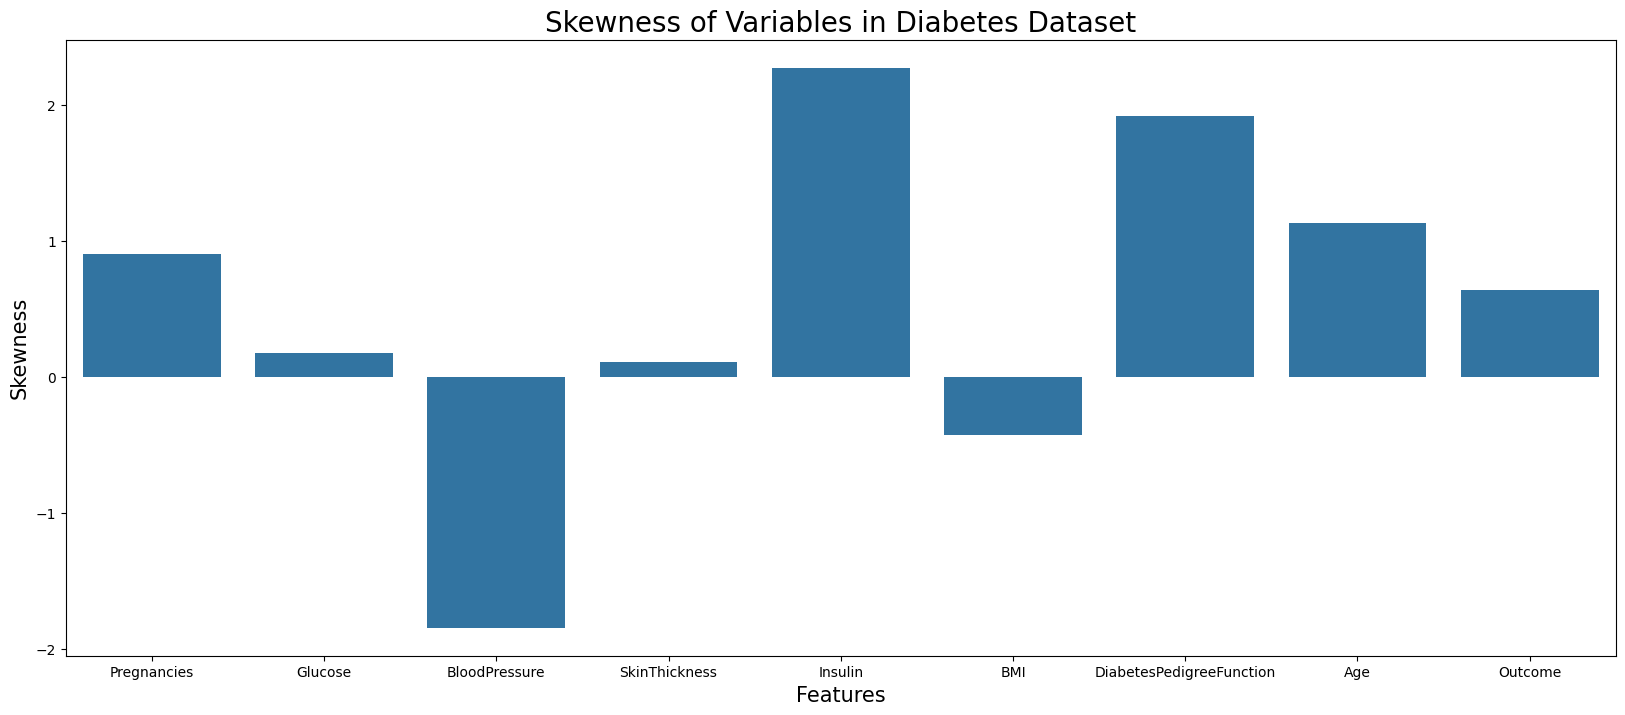

In [328]:
skewness_values = pd.DataFrame({
    'Variable': diabetes_df.columns,
    'Skewness': skew_value
})
plt.figure(figsize=(20,8))
# Plot the skewness values using a barplot
sns.barplot(x='Variable', y='Skewness', data=skewness_values)

# Add labels and a title to the plot

plt.xlabel("Features",size=15)
plt.ylabel("Skewness",size=15)
plt.title("Skewness of Variables in Diabetes Dataset",size=20)

plt.show()

In [329]:
columns_with_0 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
for col in columns_with_0:
    diabetes_df[col] = diabetes_df[col].replace(0,diabetes_df[col].median()) #แทนที่ 0 ด้วยค่ามัธยฐาน

In [330]:
(diabetes_df[columns_with_0] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [331]:
diabetes_df.describe().T
#skinthickness ยังมีค่า 0 อยู่

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [332]:
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0, np.nan)
median_value = diabetes_df['SkinThickness'].median()
diabetes_df['SkinThickness'].fillna(median_value, inplace=True)
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


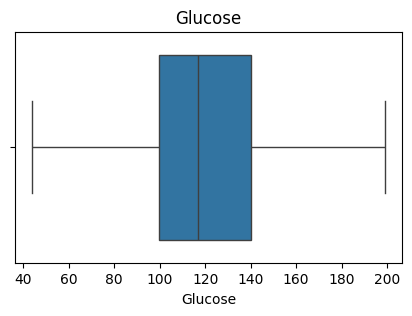

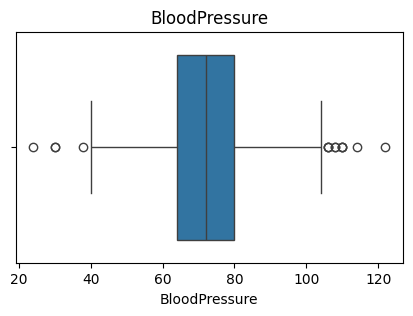

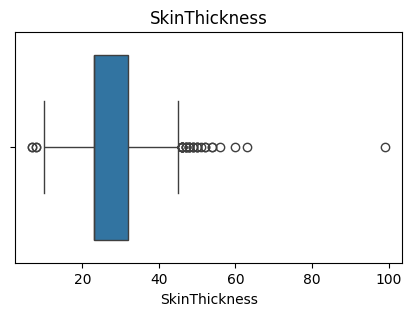

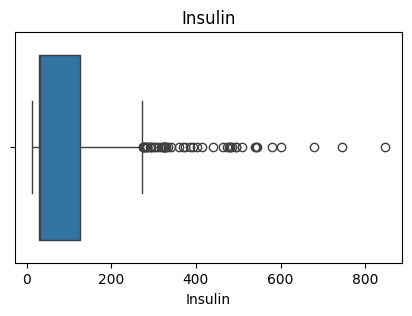

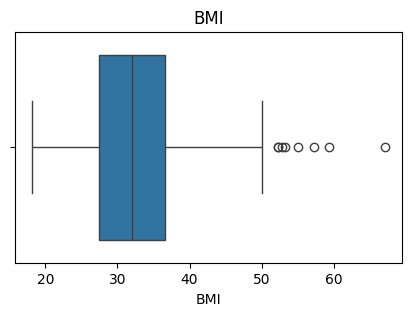

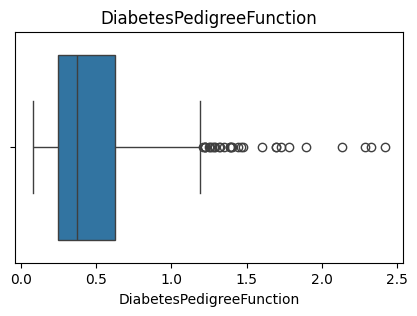

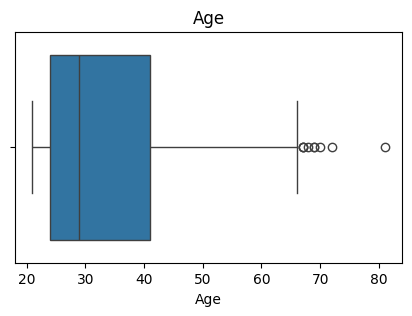

In [333]:
#ใช้boxplot ดู outlier
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for col in numeric_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=diabetes_df[col])
    plt.title(col)
    plt.show()


In [334]:
#ใช้ IQR method หา outlier
for col in numeric_features:
    Q1 = diabetes_df[col].quantile(0.25)
    Q3 = diabetes_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = diabetes_df[(diabetes_df[col] < Q1 - 1.5*IQR) | (diabetes_df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 35 outliers
Insulin: 49 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


In [335]:
# จัดการ Outliers ด้วย IQR Capping
cols_outlier = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols_outlier:
    Q1 = diabetes_df[col].quantile(0.25)
    Q3 = diabetes_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    diabetes_df[col] = diabetes_df[col].clip(lower, upper)

In [336]:
cols_skew = ['Insulin','SkinThickness','DiabetesPedigreeFunction']
for col in cols_skew:
    diabetes_df[col] = diabetes_df[col].apply(lambda x: np.log(x + 1))  # +1 ป้องกัน log(0)

In [337]:
# Scaling ด้วย RobustScaler
scaler = RobustScaler()
cols_scale = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
diabetes_df[cols_scale] = scaler.fit_transform(diabetes_df[cols_scale])

In [338]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000000,1.000000,3.000000e+00,6.000000,17.000000
Glucose,768.0,0.114969,0.751563,-1.802469,-0.425926,0.000000e+00,0.574074,2.024691
BloodPressure,768.0,0.022380,0.731069,-2.000000,-0.500000,0.000000e+00,0.500000,2.000000
SkinThickness,768.0,0.352624,0.968454,-2.595914,0.000000,0.000000e+00,1.000000,2.076906
Insulin,768.0,0.467419,0.566983,-0.545017,-0.016567,-1.595946e-16,0.983433,1.522518
BMI,768.0,0.042754,0.732706,-1.516484,-0.494505,0.000000e+00,0.505495,2.005495
DiabetesPedigreeFunction,768.0,0.162371,0.684469,-0.900726,-0.367346,-1.032160e-16,0.632654,1.759581
Age,768.0,0.247051,0.684024,-0.470588,-0.294118,0.000000e+00,0.705882,2.205882
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000e+00,1.000000,1.000000


In [339]:
#ใช้ IQR method หา outlier หลังจากการจัดการ outlier
for col in numeric_features:
    Q1 = diabetes_df[col].quantile(0.25)
    Q3 = diabetes_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = diabetes_df[(diabetes_df[col] < Q1 - 1.5*IQR) | (diabetes_df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 33 outliers
Insulin: 0 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 0 outliers
Age: 0 outliers


<Axes: xlabel='SkinThickness', ylabel='SkinThickness'>

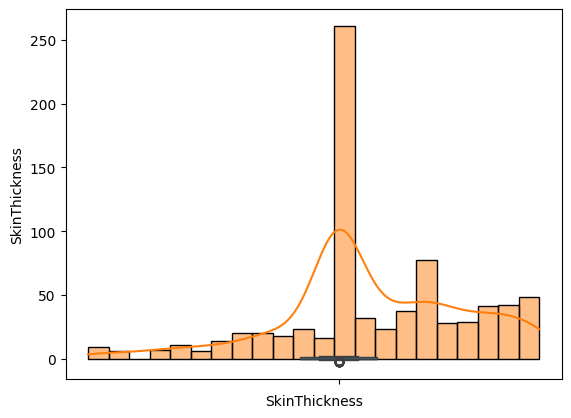

In [340]:
import seaborn as sns
sns.boxplot(diabetes_df['SkinThickness'])
sns.histplot(diabetes_df['SkinThickness'], kde=True)


In [341]:
lower = diabetes_df['SkinThickness'].quantile(0.01)
upper = diabetes_df['SkinThickness'].quantile(0.99)
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].clip(lower, upper)


In [342]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes_df['SkinThickness'] = scaler.fit_transform(diabetes_df[['SkinThickness']])


In [343]:
#ใช้ IQR method หา outlier หลังจากการจัดการ outlier
for col in numeric_features:
    Q1 = diabetes_df[col].quantile(0.25)
    Q3 = diabetes_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = diabetes_df[(diabetes_df[col] < Q1 - 1.5*IQR) | (diabetes_df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 33 outliers
Insulin: 0 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 0 outliers
Age: 0 outliers


In [344]:
diabetes_df[diabetes_df['SkinThickness'] == 0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
55,1,-1.086420,-1.375,0.0,-0.016567,-0.989011,-0.354624,-0.470588,0
254,12,-0.617284,-0.625,0.0,1.484044,-0.483516,1.263537,0.882353,1
279,2,-0.222222,-0.625,0.0,1.522518,-0.736264,1.175369,-0.411765,0
313,3,-0.098765,-1.375,0.0,0.698795,-0.274725,0.632081,-0.235294,0
382,1,-0.197531,-0.750,0.0,1.236648,-0.725275,1.303979,-0.470588,0


# EDA

In [345]:
pp_diabetes_df = diabetes_df.copy()
pp_diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.765432,0.000,0.822460,-0.016567,0.175824,0.634373,1.235294,1
1,1,-0.790123,-0.375,0.695985,-0.016567,-0.593407,-0.058879,0.117647,0
2,8,1.629630,-0.500,0.541192,-0.016567,-0.956044,0.736119,0.176471,1
3,1,-0.691358,-0.375,0.541192,0.769685,-0.428571,-0.604883,-0.470588,0
4,0,0.493827,-2.000,0.822460,1.179961,1.219780,1.759581,0.235294,1
5,5,-0.024691,0.125,0.541192,-0.016567,-0.703297,-0.497784,0.058824,0
6,3,-0.962963,-1.375,0.762101,0.723217,-0.109890,-0.354624,-0.176471,1
7,10,-0.049383,0.000,0.541192,-0.016567,0.362637,-0.711859,0.000000,0
8,2,1.975309,-0.125,0.992501,1.522518,-0.164835,-0.633756,1.411765,1
9,8,0.197531,1.500,0.541192,-0.016567,0.000000,-0.402745,1.470588,1


In [346]:
pp_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [347]:
pp_diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000000,1.000000,3.000000e+00,6.000000,17.000000
Glucose,768.0,0.114969,0.751563,-1.802469,-0.425926,0.000000e+00,0.574074,2.024691
BloodPressure,768.0,0.022380,0.731069,-2.000000,-0.500000,0.000000e+00,0.500000,2.000000
SkinThickness,768.0,0.619258,0.213440,0.000000,0.541192,5.411916e-01,0.762101,1.000000
Insulin,768.0,0.467419,0.566983,-0.545017,-0.016567,-1.595946e-16,0.983433,1.522518
BMI,768.0,0.042754,0.732706,-1.516484,-0.494505,0.000000e+00,0.505495,2.005495
DiabetesPedigreeFunction,768.0,0.162371,0.684469,-0.900726,-0.367346,-1.032160e-16,0.632654,1.759581
Age,768.0,0.247051,0.684024,-0.470588,-0.294118,0.000000e+00,0.705882,2.205882
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000e+00,1.000000,1.000000


In [348]:
#Skewness ตรวจสอบค่าเบ้ ของข้อมูลในแต่ละคอลัมน์
skew_value = pp_diabetes_df.skew()

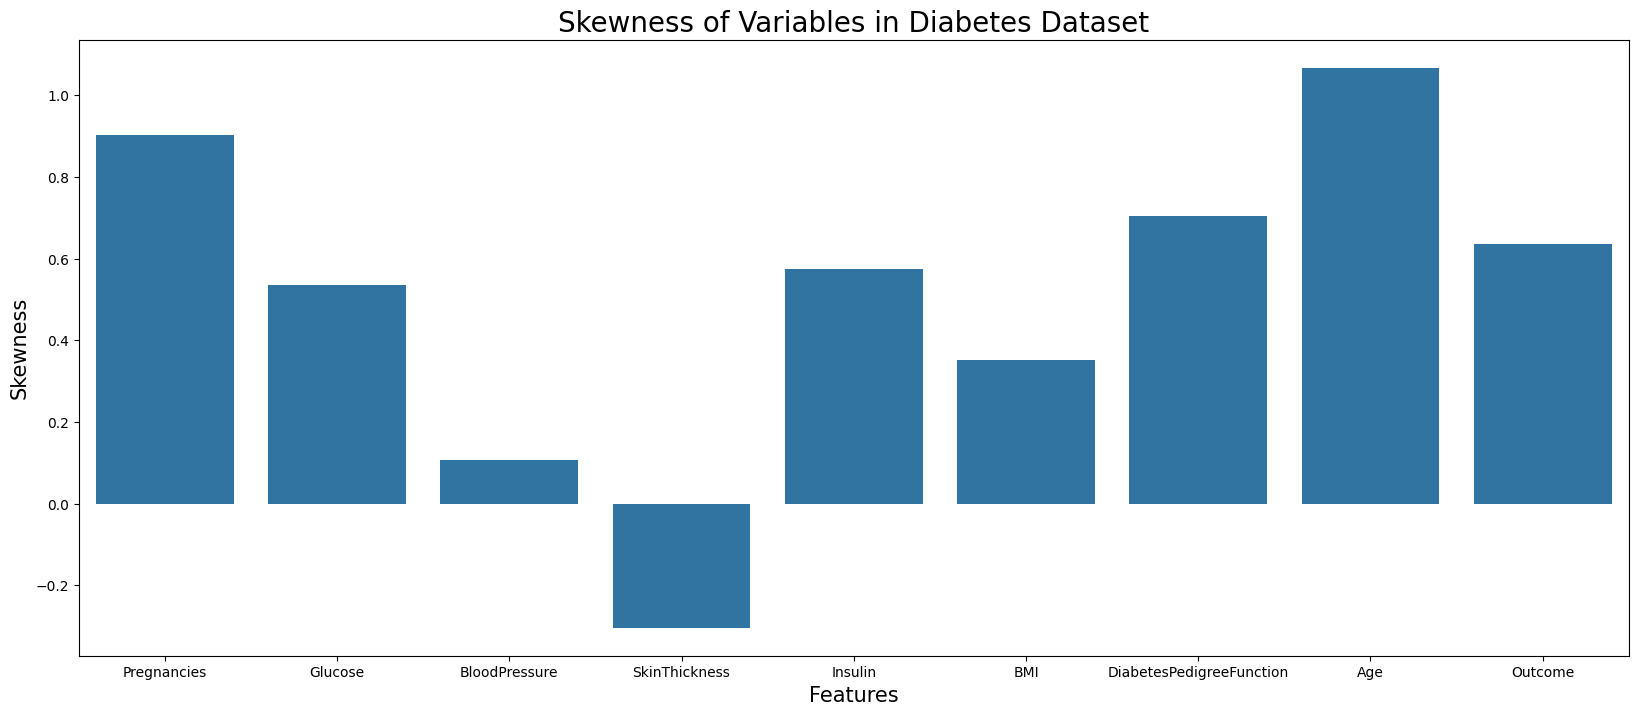

In [349]:
skewness_values = pd.DataFrame({
    'Variable': pp_diabetes_df.columns,
    'Skewness': skew_value
})
plt.figure(figsize=(20,8))
# Plot the skewness values using a barplot
sns.barplot(x='Variable', y='Skewness', data=skewness_values)

# Add labels and a title to the plot

plt.xlabel("Features",size=15)
plt.ylabel("Skewness",size=15)
plt.title("Skewness of Variables in Diabetes Dataset",size=20)

plt.show()

# Data Visualization

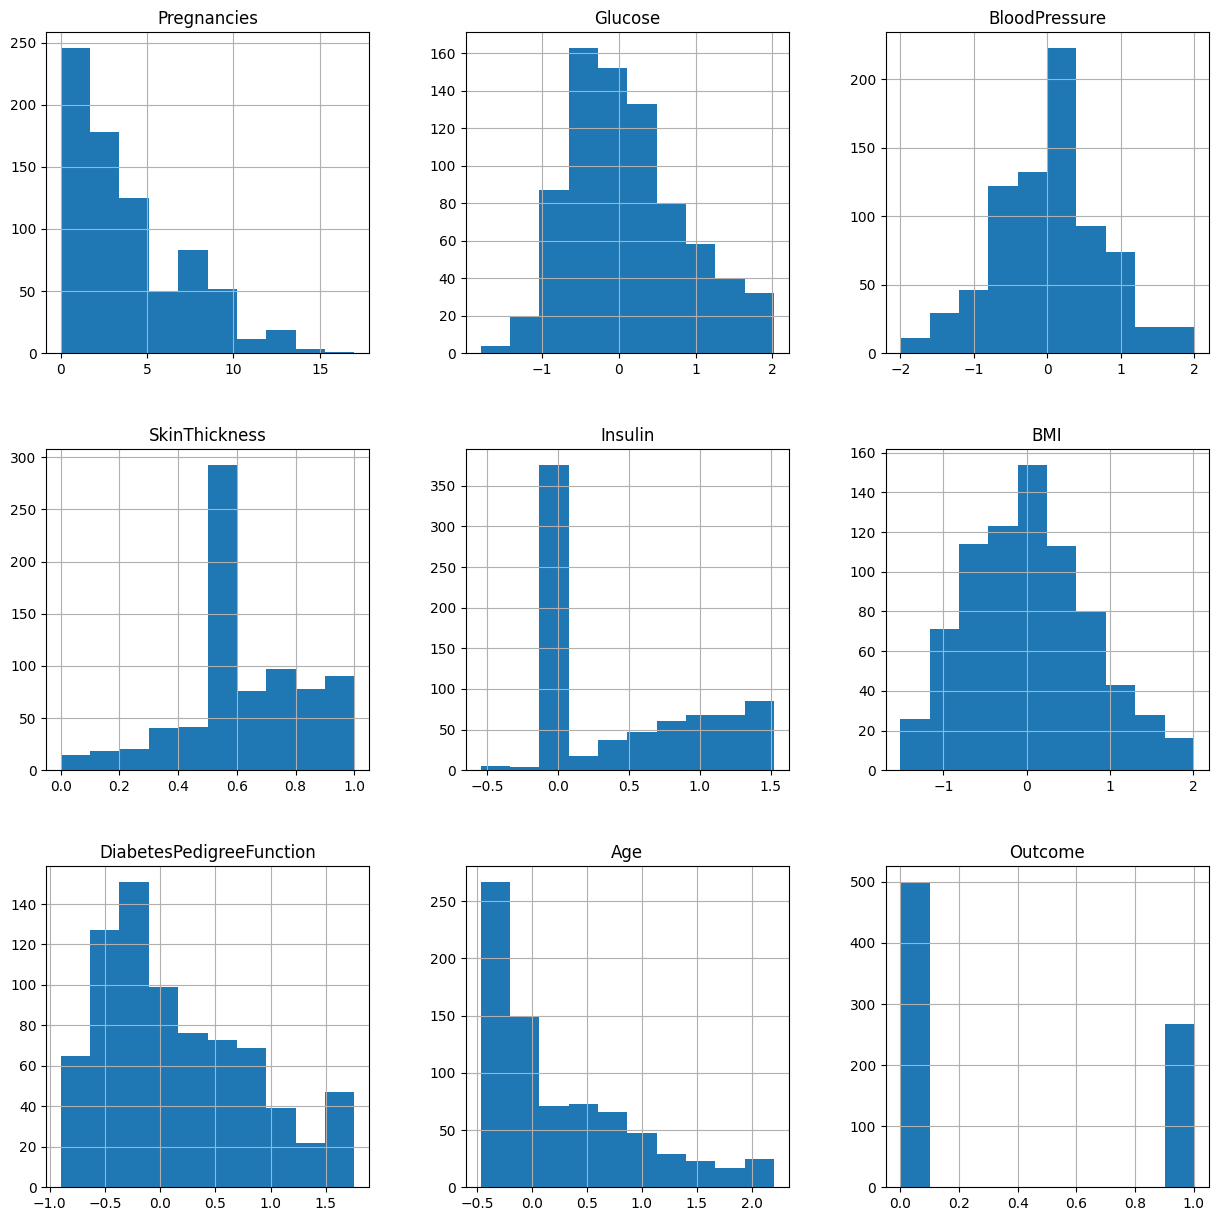

In [394]:
# Histrogram for each attribute in dataset
pp_diabetes_df.hist(figsize=(15,15))
plt.show()

Outcome
0    500
1    268
dtype: int64


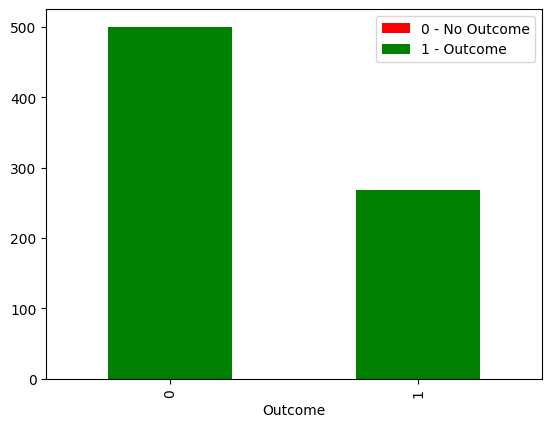

In [400]:
# Class distribution to preview diabetic statistics
result = pp_diabetes_df.groupby('Outcome').size()
print(result)
ax = result.plot(kind='bar',color='red',label='0 - No Outcome')
ax = result.plot(kind='bar',color='green',label='1 - Outcome')
ax.legend(loc='best')

In [352]:
# Define the feature matrix and target vector before feature selection
X = pp_diabetes_df.drop(columns=['Outcome'])
y = pp_diabetes_df['Outcome']
print(X,y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.765432          0.000       0.822460 -0.016567  0.175824   
1              1 -0.790123         -0.375       0.695985 -0.016567 -0.593407   
2              8  1.629630         -0.500       0.541192 -0.016567 -0.956044   
3              1 -0.691358         -0.375       0.541192  0.769685 -0.428571   
4              0  0.493827         -2.000       0.822460  1.179961  1.219780   
..           ...       ...            ...            ...       ...       ...   
763           10 -0.395062          0.250       1.000000  1.228820  0.098901   
764            2  0.123457         -0.125       0.648125 -0.016567  0.527473   
765            5  0.098765          0.000       0.541192  0.893270 -0.637363   
766            1  0.222222         -0.750       0.541192 -0.016567 -0.208791   
767            1 -0.592593         -0.125       0.740755 -0.016567 -0.175824   

     DiabetesPedigreeFunction       Age

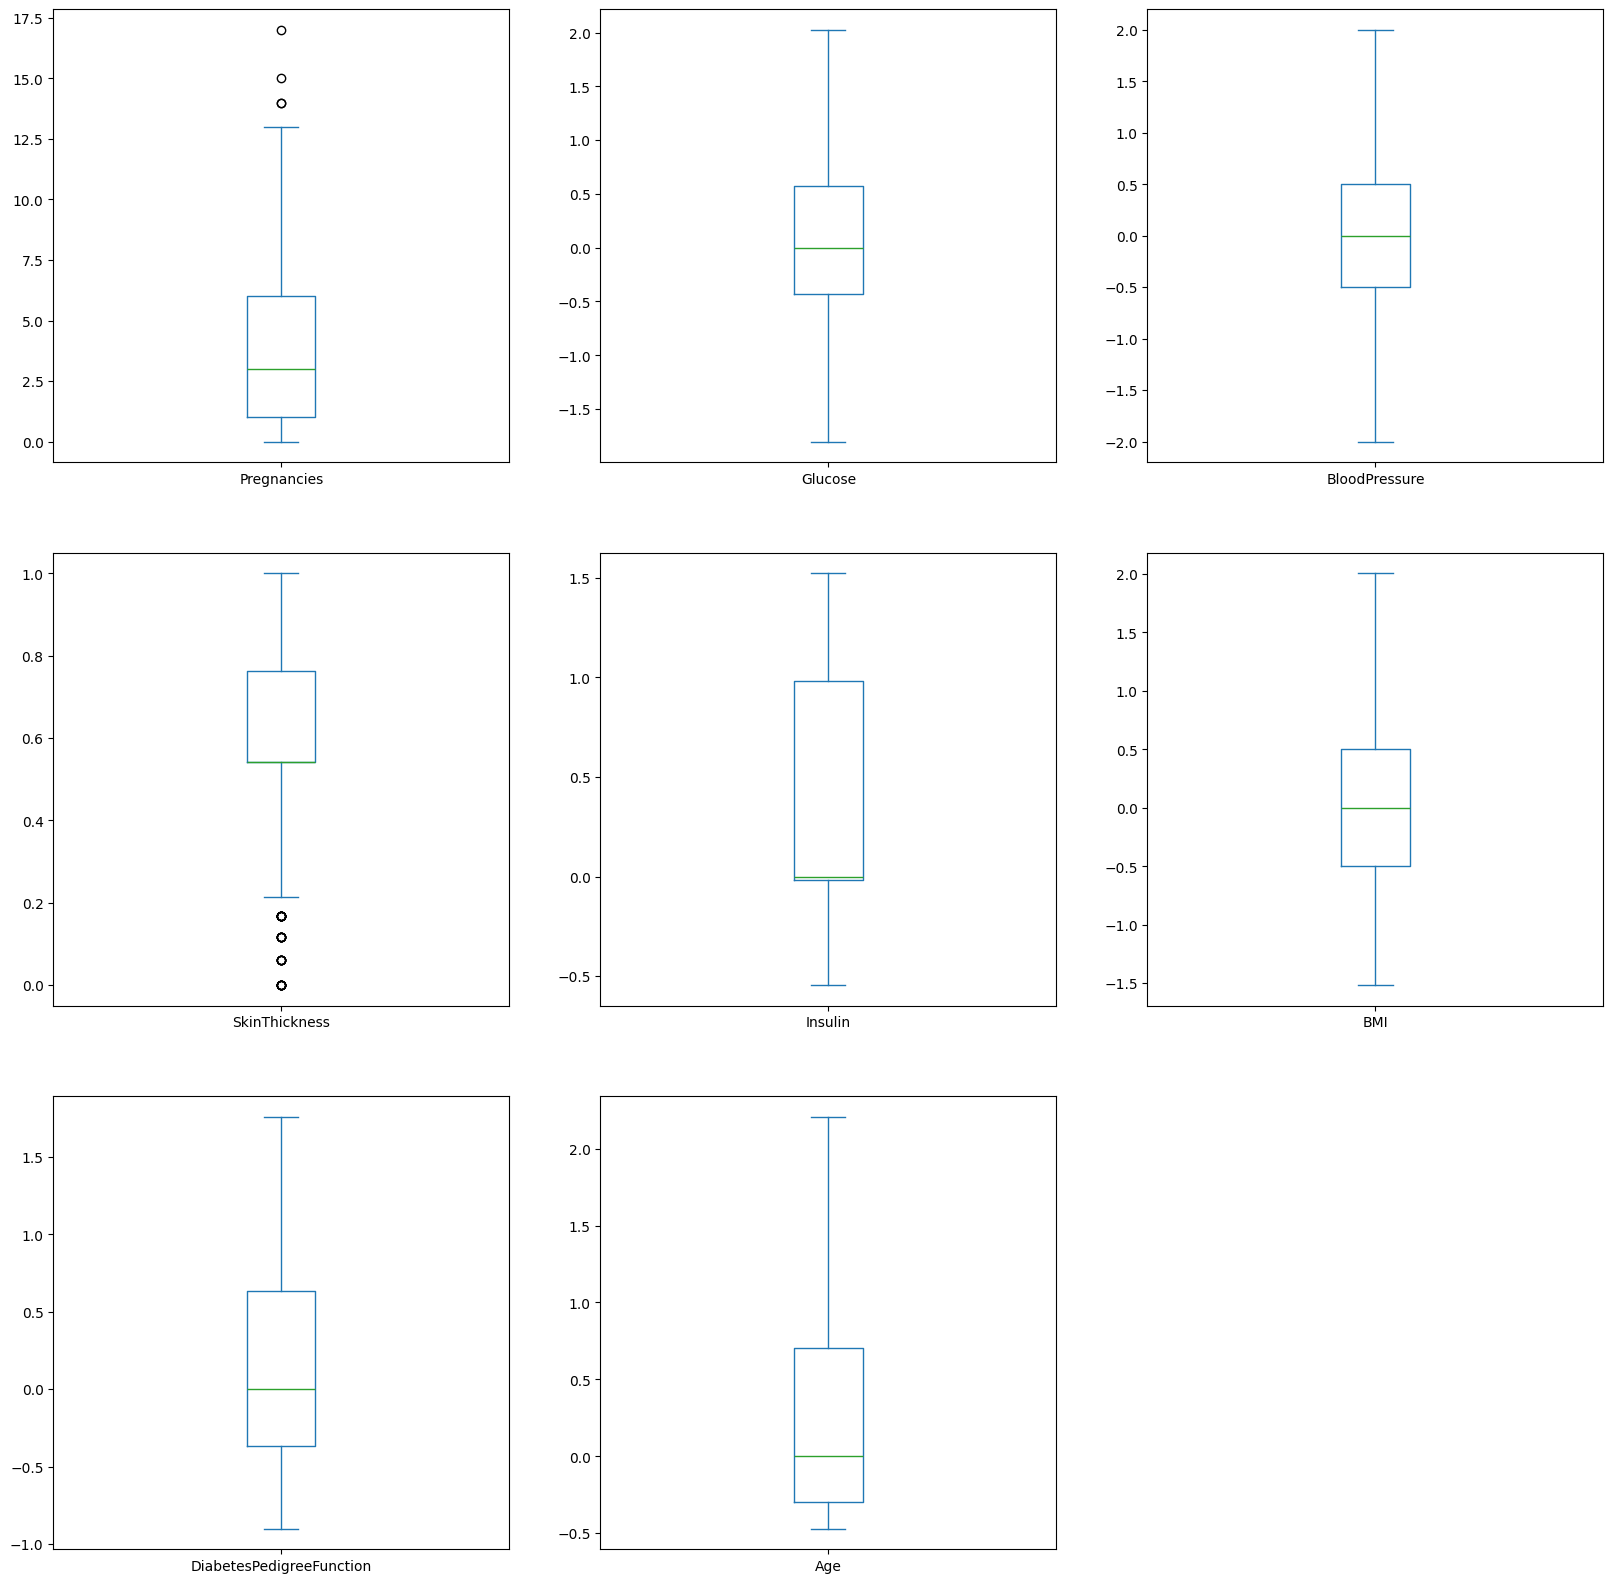

In [353]:
# Box and Whisker Plots
X.plot(figsize=(20,20),kind='box',subplots=True,layout=(3,3),sharex=False)
plt.show()

# Feature Selection

In [354]:
# Reviewing Correlation between attributes
correlations = round(X.corr(),4)
correlations 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0000,0.1282,0.2091,0.0785,-0.0890,0.0292,-0.0187,0.5479
Glucose,0.1282,1.0000,0.2202,0.1689,0.2657,0.2340,0.1152,0.2689
BloodPressure,0.2091,0.2202,1.0000,0.1686,-0.0693,0.2864,0.0080,0.3329
SkinThickness,0.0785,0.1689,0.1686,1.0000,0.2282,0.5584,0.0938,0.0755
Insulin,-0.0890,0.2657,-0.0693,0.2282,1.0000,0.1850,0.2041,-0.0871
BMI,0.0292,0.2340,0.2864,0.5584,0.1850,1.0000,0.1395,0.0359
DiabetesPedigreeFunction,-0.0187,0.1152,0.0080,0.0938,0.2041,0.1395,1.0000,0.0452
Age,0.5479,0.2689,0.3329,0.0755,-0.0871,0.0359,0.0452,1.0000


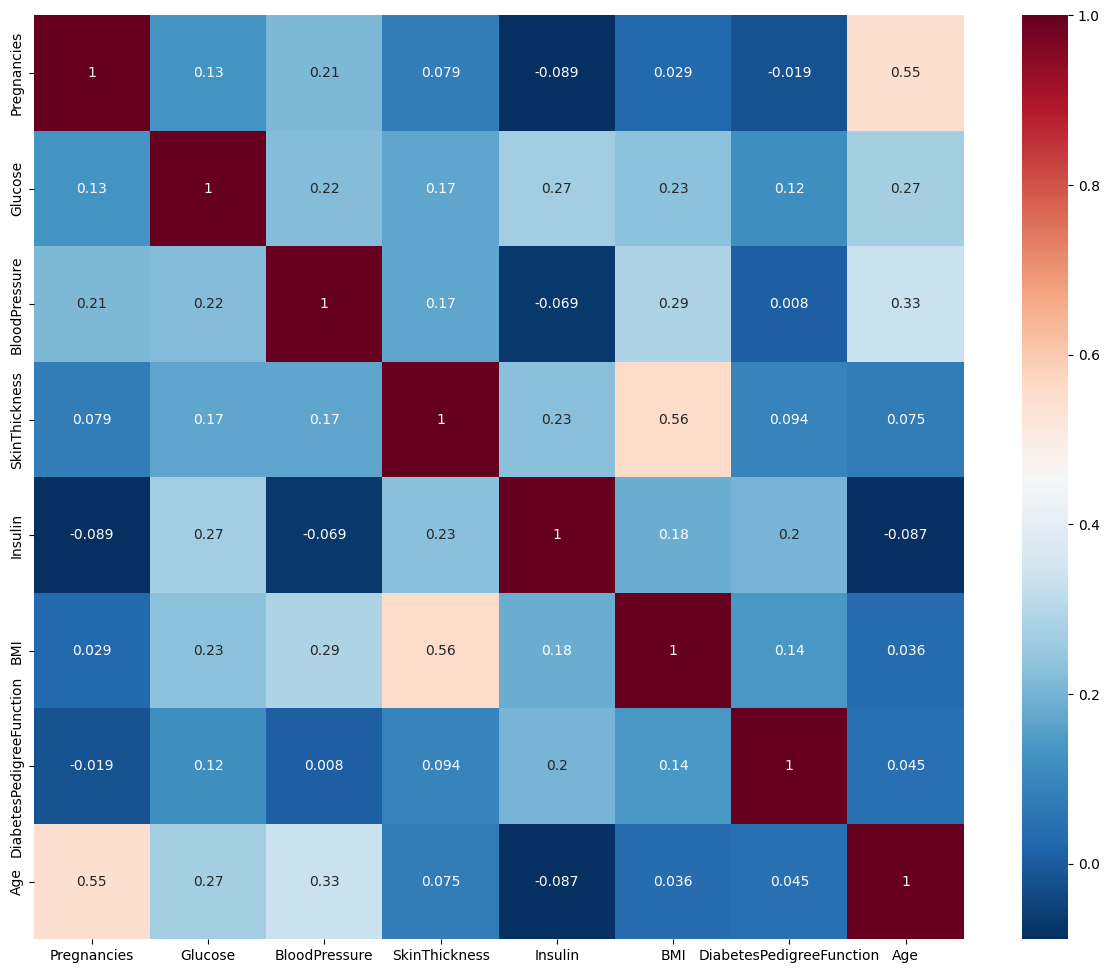

In [355]:
plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True,cmap ='RdBu_r')
plt.show()

In [356]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(correlations.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(correlations.iloc[i, j]) > 0.7:
            print(correlations.columns[i], correlations.columns[j], correlations.iloc[i, j])
else:
    print('The coefficient of each features not greater than 0.7')

The coefficient of each features not greater than 0.7


In [357]:
# Merge features and targets together for checking correlation
X_y = X.copy()
X_y['Outcome'] = y
print(X_y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.765432          0.000       0.822460 -0.016567  0.175824   
1              1 -0.790123         -0.375       0.695985 -0.016567 -0.593407   
2              8  1.629630         -0.500       0.541192 -0.016567 -0.956044   
3              1 -0.691358         -0.375       0.541192  0.769685 -0.428571   
4              0  0.493827         -2.000       0.822460  1.179961  1.219780   
..           ...       ...            ...            ...       ...       ...   
763           10 -0.395062          0.250       1.000000  1.228820  0.098901   
764            2  0.123457         -0.125       0.648125 -0.016567  0.527473   
765            5  0.098765          0.000       0.541192  0.893270 -0.637363   
766            1  0.222222         -0.750       0.541192 -0.016567 -0.208791   
767            1 -0.592593         -0.125       0.740755 -0.016567 -0.175824   

     DiabetesPedigreeFunction       Age

In [358]:
correlation = X_y.corr()
correlation_target = correlation[['Outcome']].drop(labels=['Outcome'])
correlation_target

,Outcome
Pregnancies,0.221898
Glucose,0.492782
BloodPressure,0.168971
SkinThickness,0.202157
Insulin,0.104526
BMI,0.313030
DiabetesPedigreeFunction,0.184836
Age,0.242702


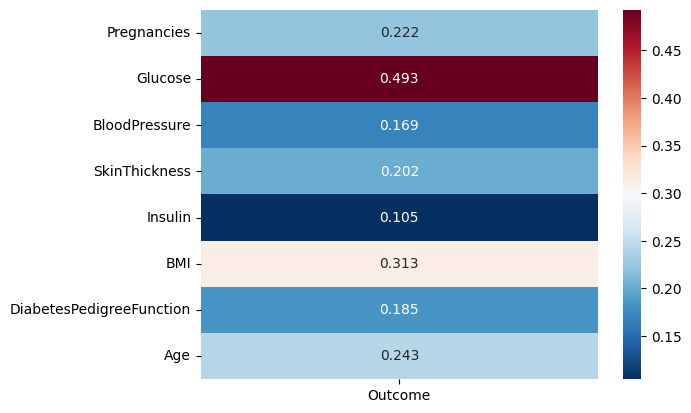

In [359]:
sns.heatmap(correlation_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [360]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.765432,0.000,0.822460,-0.016567,0.175824,0.634373,1.235294
1,1,-0.790123,-0.375,0.695985,-0.016567,-0.593407,-0.058879,0.117647
2,8,1.629630,-0.500,0.541192,-0.016567,-0.956044,0.736119,0.176471
3,1,-0.691358,-0.375,0.541192,0.769685,-0.428571,-0.604883,-0.470588
4,0,0.493827,-2.000,0.822460,1.179961,1.219780,1.759581,0.235294
5,5,-0.024691,0.125,0.541192,-0.016567,-0.703297,-0.497784,0.058824
6,3,-0.962963,-1.375,0.762101,0.723217,-0.109890,-0.354624,-0.176471
7,10,-0.049383,0.000,0.541192,-0.016567,0.362637,-0.711859,0.000000
8,2,1.975309,-0.125,0.992501,1.522518,-0.164835,-0.633756,1.411765
9,8,0.197531,1.500,0.541192,-0.016567,0.000000,-0.402745,1.470588


# Modeling

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV

In [ ]:
def feature_selection(dt_model, x_data):
    
    # Ensure the random distributions are same when execute 
    np.random.seed(0)
    
    sfs = SFS(dt_model,
          k_features=8,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)
    
    sfs.fit(x_data, y)
    
    print('Feature selection: \n\n')
    for idx, score in sfs.subsets_.items():
    	print(idx,':', score, '\n')
    
    
    for idx, score in sfs.subsets_.items():
        print(idx,':', score['avg_score'].round(4)*100, '%')
    
    plot_sfs(sfs.get_metric_dict())
    plt.grid()
    plt.title('Accuracy vs Number of Features')
    plt.show()

In [363]:
def conf_matrix_plot(conf_matrix):
    
    ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.plot(conf_matrix)
    plt.show()

In [364]:
def class_report_plot(class_report):
    
    plt.figure(figsize=(10,3))
    plt.title('Model Classification Report\n\n')
    sns.heatmap(class_report, annot=True,  fmt='g')
    plt.show()

In [365]:
def auc_roc(model,y_test,y_predicted):
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    auc = round(metrics.roc_auc_score(y_test, y_predicted), 4)
    plt.plot(fpr,tpr,color='red', linestyle='--', marker='o', linewidth=2, label= model+" AUC="+str(auc))
    plt.grid()
    plt.legend()
    plt.title('AUC ROC of '+ model)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.show()

## Decision tree

Feature selection: 


1 : {'feature_idx': (1,), 'cv_scores': array([0.70779221, 0.68831169, 0.70779221, 0.73202614, 0.74509804]), 'avg_score': np.float64(0.716204057380528), 'feature_names': ('Glucose',)} 

2 : {'feature_idx': (1, 3), 'cv_scores': array([0.68831169, 0.67532468, 0.68181818, 0.69934641, 0.73856209]), 'avg_score': np.float64(0.6966726084373143), 'feature_names': ('Glucose', 'SkinThickness')} 

3 : {'feature_idx': (1, 3, 6), 'cv_scores': array([0.71428571, 0.64935065, 0.66233766, 0.75163399, 0.65359477]), 'avg_score': np.float64(0.6862405568287921), 'feature_names': ('Glucose', 'SkinThickness', 'DiabetesPedigreeFunction')} 

4 : {'feature_idx': (1, 3, 5, 6), 'cv_scores': array([0.67532468, 0.66883117, 0.68831169, 0.7254902 , 0.64052288]), 'avg_score': np.float64(0.6796961208725915), 'feature_names': ('Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction')} 

5 : {'feature_idx': (1, 3, 5, 6, 7), 'cv_scores': array([0.70779221, 0.62987013, 0.64935065, 0.74509804, 0.69

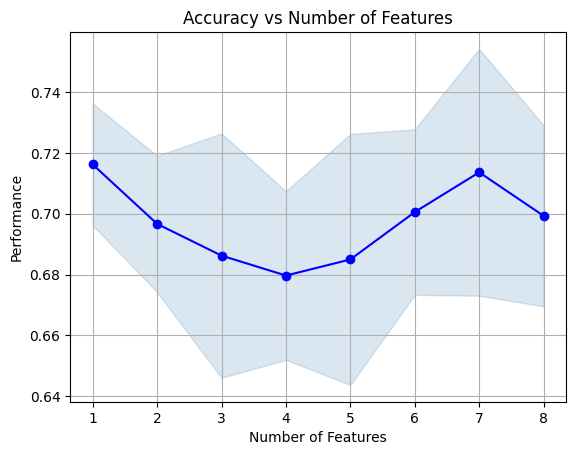

In [366]:
# Decision Tree Algorithm
start_time = time.time()
initial_memory = process.memory_info().rss

dt_model = DecisionTreeClassifier()
    
# Import feature_selection function
feature_selection(dt_model, X)

In [386]:
 # From wrapper method, we know which features removed was useful to increase accuracy of model.
X_data = X[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.5, random_state=6)

dt_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  69.44 %



Validation set accuracy after hyperparameter tuning:  69.44 %

Decision Tree Model Test Set Accuracy:  71.88 %

Decision Tree Model Confusion Matrix: 



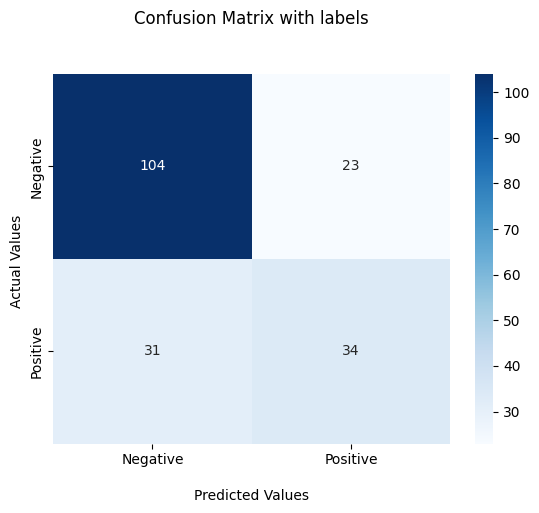

Decision Tree Model Classification Report: 



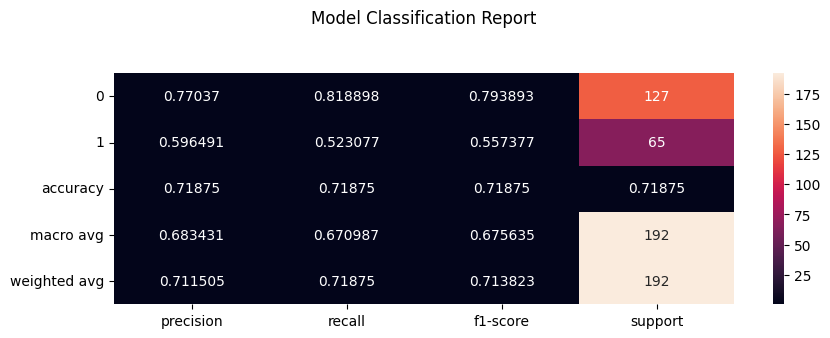

Memory usage: -1839104 bytes

Runtime: 1.51 s


In [369]:
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40)

dt_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_predicted_dt)
print("Decision Tree Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_dt)
print("Decision Tree Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_dt, output_dict=True)).transpose()
print("Decision Tree Model Classification Report: \n")
class_report_plot(class_report)
    
end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')
print("Runtime:", round(run_time,2), 's')

DT Model AUC: 0.6162


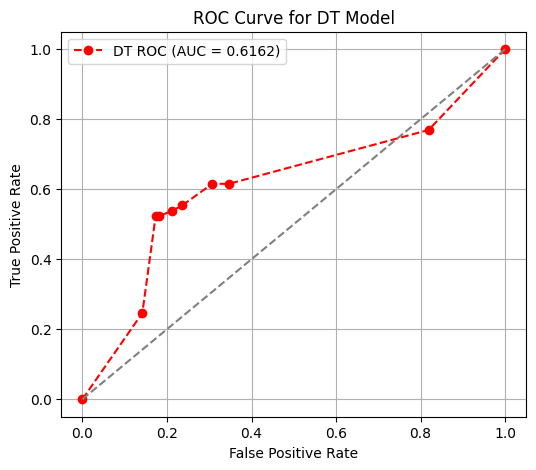

In [387]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ทำนายความน่าจะเป็นของ class Positive
y_prob_dt = dt_model.predict_proba(X_test)[:,1]  # Probability ของ class 1

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# คำนวณ AUC
auc_score = roc_auc_score(y_test, y_prob_dt)
print("DT Model AUC:", round(auc_score,4))

# วาด ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', marker='o', linestyle='--', label=f'DT ROC (AUC = {auc_score:.4f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')  # เส้น reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DT Model')
plt.legend()
plt.grid()
plt.show()


## SVM

Best SVM Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 72.73 %

Confusion Matrix:
[[40 10]
 [11 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        50
           1       0.62      0.59      0.60        27

    accuracy                           0.73        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.73      0.73      0.73        77



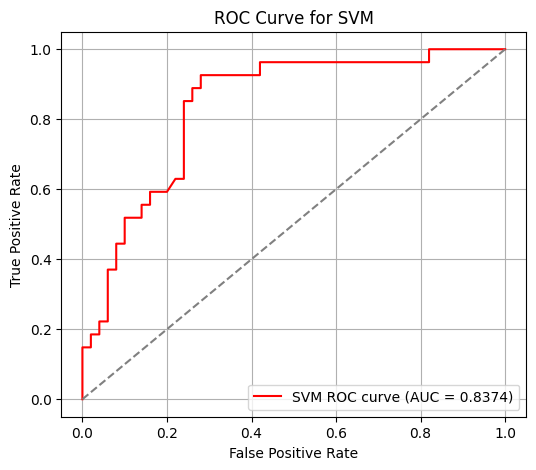

In [392]:
# Scale feature (SVM sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = feature matrix
y = y  # target vector

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# Define SVM model
svm_model = SVC(probability=True, random_state=42)  # probability=True for ROC curve

# Hyperparameter tuning with GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best SVM model
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Evaluate on test set
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:,1]

print("Test Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM ROC curve (AUC = {auc_score:.4f})", color='red')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.grid()
plt.show()


SVM Model Confusion Matrix: 



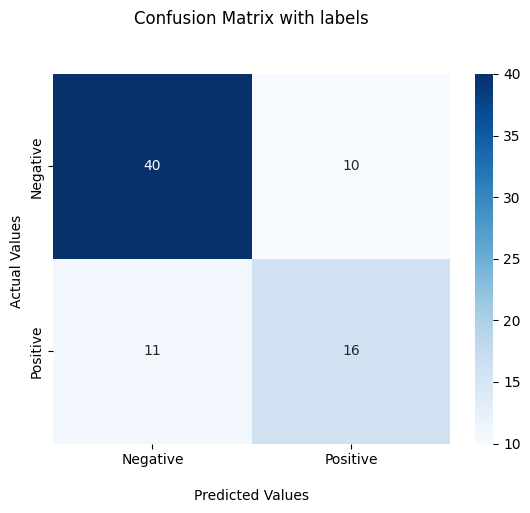

SVM Model Classification Report: 



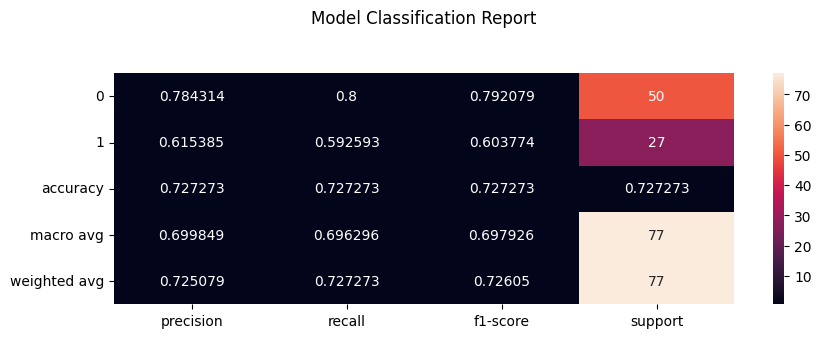

Memory usage: -125390848 bytes

Runtime: 7111.49 s


In [ ]:
# แสดง Confusion Matrix ---
print("SVM Model Confusion Matrix: \n")
conf_matrix_svm = confusion_matrix(y_test, y_pred)
conf_matrix_plot(conf_matrix_svm) # เรียกใช้ฟังก์ชันพล็อตของคุณ

# แสดง Classification Report ---
print("SVM Model Classification Report: \n")
class_report_svm = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
class_report_plot(class_report_svm) # เรียกใช้ฟังก์ชันพล็อตของคุณ

# สิ้นสุดการวัดประสิทธิภาพ ---
end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print(f"Memory usage: {memory_usage} bytes\n")
print(f"Runtime: {run_time:.2f} s")

### SVM Explanability

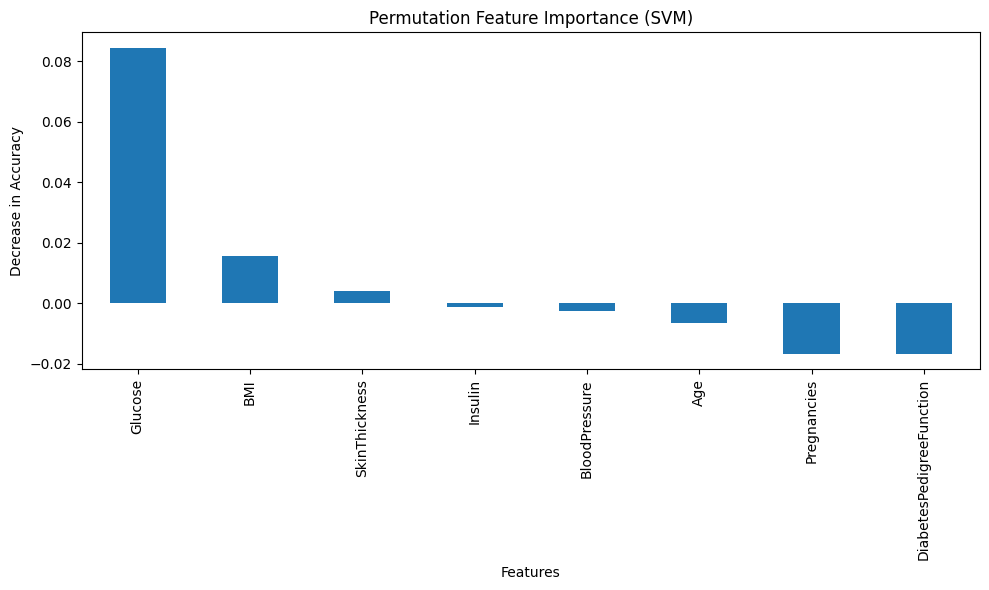

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

result = permutation_importance(
    best_svm, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1
)

# สร้าง Series โดยใช้ชื่อ feature ที่ถูกต้อง
importance = pd.Series(result.importances_mean, index=feature_names)

plt.figure(figsize=(10, 6)) # ขยายขนาดกราฟ
importance.sort_values(ascending=False).plot(
    kind='bar', 
    title="Permutation Feature Importance (SVM)"
)
plt.ylabel("Decrease in Accuracy") 
plt.xlabel("Features")
plt.tight_layout() 
plt.show()

## KNN

Feature selection: 


1 : {'feature_idx': (1,), 'cv_scores': array([0.70779221, 0.66233766, 0.68831169, 0.73856209, 0.74509804]), 'avg_score': np.float64(0.7084203378321026), 'feature_names': ('Glucose',)} 

2 : {'feature_idx': (1, 7), 'cv_scores': array([0.69480519, 0.72077922, 0.72077922, 0.80392157, 0.76470588]), 'avg_score': np.float64(0.7409982174688057), 'feature_names': ('Glucose', 'Age')} 

3 : {'feature_idx': (0, 1, 7), 'cv_scores': array([0.75974026, 0.70779221, 0.69480519, 0.77777778, 0.75816993]), 'avg_score': np.float64(0.7396570749511925), 'feature_names': ('Pregnancies', 'Glucose', 'Age')} 

4 : {'feature_idx': (0, 1, 3, 7), 'cv_scores': array([0.73376623, 0.7012987 , 0.7012987 , 0.77777778, 0.75816993]), 'avg_score': np.float64(0.7344622697563874), 'feature_names': ('Pregnancies', 'Glucose', 'SkinThickness', 'Age')} 

5 : {'feature_idx': (0, 1, 2, 3, 7), 'cv_scores': array([0.77922078, 0.7012987 , 0.72077922, 0.75163399, 0.75163399]), 'avg_score': np.float64(0.740913335

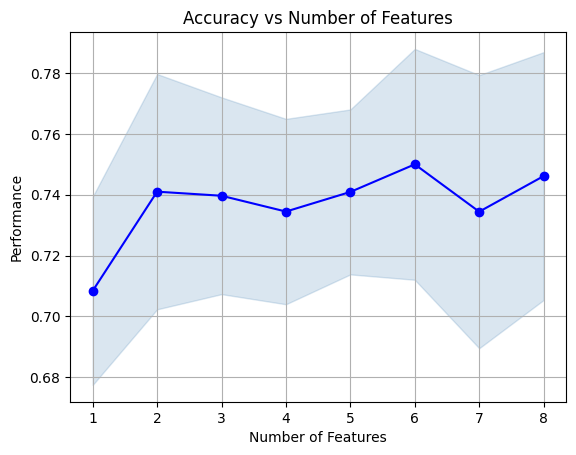

In [371]:
start_time = time.time()
initial_memory = process.memory_info().rss

knn_model = KNeighborsClassifier()

feature_selection(knn_model, X)

In [372]:
X_data = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.7, random_state=6)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  75.14 %



The maximum accuracy is 77.45664739884393 when the K value is [14] after feature selection.



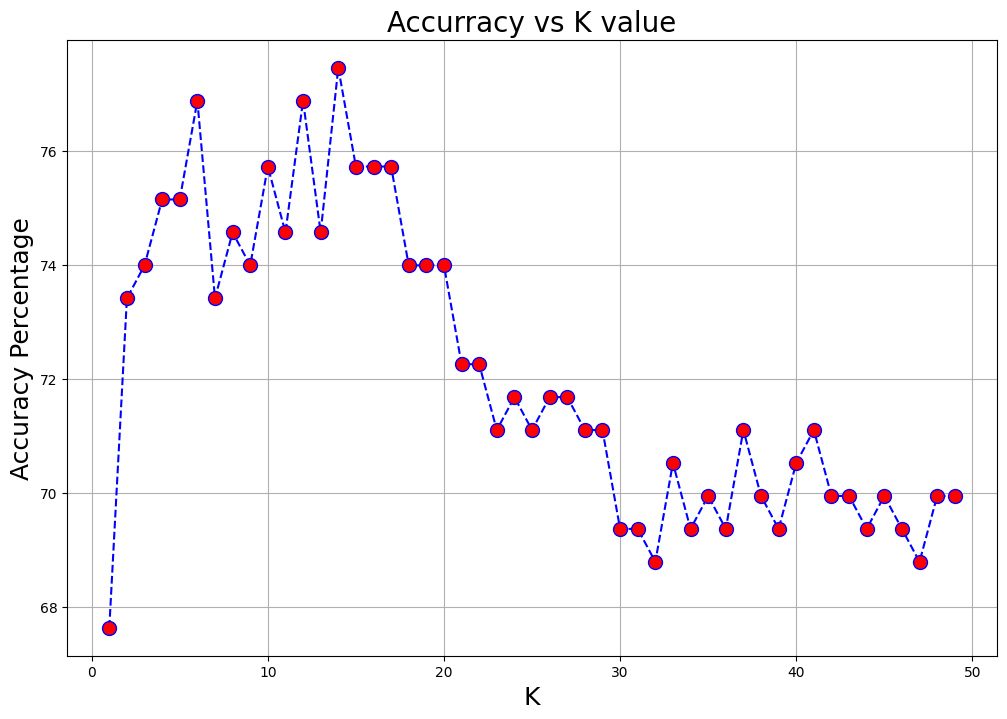

In [373]:
# Define the best value of K in KNN
score_list = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    score = model.score(X_val, y_val)
    score_list.append(score*100)

max_score = max(score_list)

k = [idx+1 for idx, score in enumerate(score_list) if score == max_score]
print(f'The maximum accuracy is {max_score} when the K value is {k} after feature selection.\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,50), score_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accurracy vs K value',size=20)
plt.xlabel('K',size=18)
plt.ylabel('Accuracy Percentage',size=18)
plt.grid()
plt.show()

Validation set accuracy after hyperparameter tuning:  76.88 %

K Nearest Neighbor Model Test Set Accuracy:  75.0 %

K Nearest Neighbor Model Confusion Matrix: 



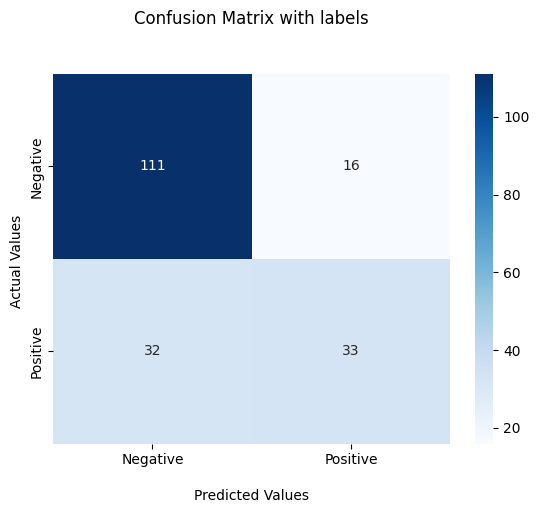

K Nearest Neighbor Model Classification Report: 



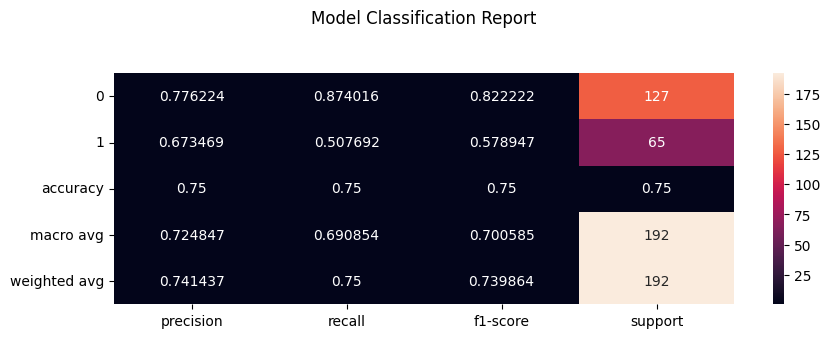

Memory usage: 4173824 bytes

Runtime: 1.32 s


In [374]:
knn_model = KNeighborsClassifier(6)

knn_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = knn_model.predict(X_val)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]  
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_knn = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_knn, output_dict=True)).transpose()
print("K Nearest Neighbor Model Classification Report: \n")
class_report_plot(class_report)


end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

KNN Model AUC: 0.807


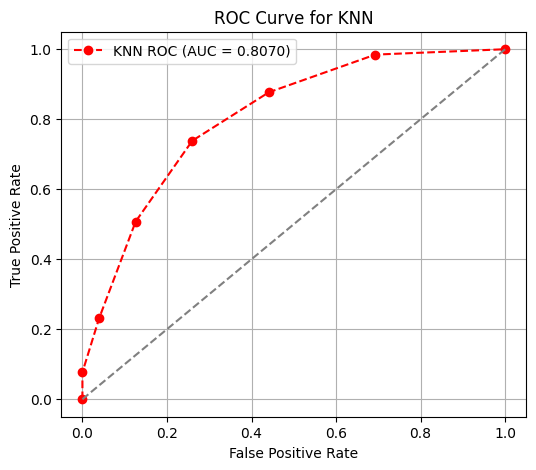

In [375]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ทำนายความน่าจะเป็นของ class Positive
y_prob_knn = knn_model.predict_proba(X_test)[:,1]  # Probability ของ class 1

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# คำนวณ AUC
auc_score = roc_auc_score(y_test, y_prob_knn)
print("KNN Model AUC:", round(auc_score,4))

# วาด ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', marker='o', linestyle='--', label=f'KNN ROC (AUC = {auc_score:.4f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')  # เส้น reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid()
plt.show()


### KNN Explainability

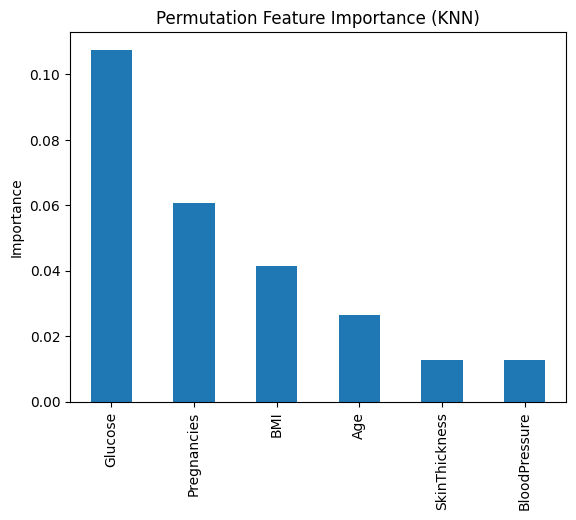

In [376]:
# Permutation Feature Importance

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

result = permutation_importance(knn_model, X_val, y_val, n_repeats=10, random_state=0)
importance = pd.Series(result.importances_mean, index=X_data.columns)
importance.sort_values(ascending=False).plot(kind='bar', title="Permutation Feature Importance (KNN)")
plt.ylabel("Importance")
plt.show()

## save model

In [377]:
import joblib

# knn_model.save
joblib.dump(model, "knn_model.pkl")

['knn_model.pkl']

## test model

In [378]:
import joblib
from sklearn.metrics import accuracy_score

# โหลดโมเดล
knn_model = joblib.load("knn_model.pkl")

# สมมติว่ามี X_test, y_test เตรียมไว้แล้ว
y_pred = knn_model.predict(X_test)

# ประเมินผลโมเดล
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ใช้โมเดลทำนายข้อมูลใหม่
# new_data = [...]  # ใส่ข้อมูลใหม่
# result = knn_model.predict(new_data)
# print("Prediction:", result)



Accuracy: 0.734375
